import numpy as np

import matplotlib.pyplot as plt
plt.style.use('ggplot')
#%matplotlib inline  

import pandas as pd
import numpy as np


import matplotlib.pyplot as plt
plt.style.use('ggplot')
%matplotlib inline  

from itertools import cycle

from sklearn import metrics

from sklearn import model_selection
from sklearn.multiclass import OneVsRestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC, LinearSVC
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neural_network import MLPClassifier

from sklearn.multiclass import OneVsRestClassifier

from sklearn.preprocessing import StandardScaler, LabelBinarizer

# loading sensor data

df_tr_lbl = pd.read_csv('/Users/navyarao/Downloads/Pred_maintainance.csv')
df_tr_lbl.head()

In [199]:
df_tr_lbl.isnull().sum()

Timestamp            0
AI552051.754         0
AI552051.754_ALM     0
BACT.552051          0
BCMPLT.552051        0
CYCLE.552051         0
FAL552051.754        0
FI552051_718         0
FIC552051_718        0
FQI552051.718        0
HV552051.331         0
HV552051.332         0
LAH552051.670        0
LAH552051.678        0
LAH552051.680        0
M552051.801          0
M552051.802          0
M552051.823          0
M552051.826          0
M552051.871          0
MAINT.552051         0
MODMAN.552051        0
MODSTS.552051        0
PARTREC.552051       0
PHASE.552051         0
PHTIME.552051        0
PI552051.641         0
PI552051.642         0
PI552051.645         0
PI552051.646         0
PI552051.651         0
PIN.552051           0
QCA552051_001        0
RUN.552051           0
SI552051.801         0
SIA552051.801        0
SIC552051.801        0
SIC552051.801_ALM    0
SIC552051.801_CO     0
SIC552051.801_SP     0
SSOALM.552051        0
TIC552051.616        0
VI552051.748         0
VI552051.74

In [225]:
df_tr_lbl.dropna(inplace=True)

# Get mean of all the numeric columns by excluding Bad Input and I/O time out from numeric sensor data

In [226]:
strings = df_tr_lbl.replace('Bad Input', np.nan).dropna()

strings = strings.replace('I/O Timeout', np.nan).dropna()


unwanted_num=['Timestamp','AI552051.754_ALM','BACT.552051','BCMPLT.552051','FAL552051.754','HV552051.331',	'HV552051.332',	'LAH552051.670',	'LAH552051.678','LAH552051.680','M552051.801','M552051.802','M552051.823','M552051.826','M552051.871','MAINT.552051'	,'MODMAN.552051','PARTREC.552051', 'QCA552051_001','RUN.552051','SIC552051.801_ALM','SSOALM.552051','VI552051.748_ALM','ZS552051.737','ZS552051.740','ZS552051_753']

str_cols = strings.columns



list1 = [ele for ele in str_cols if ele not in unwanted_num] 


new_df_str=df_tr_lbl[list1]

new_df_str= new_df_str.apply(pd.to_numeric, errors='coerce')


# Replacing Bad Input and I/O timeout in numeric data with mean of the column

In [202]:
list1

['AI552051.754',
 'CYCLE.552051',
 'FI552051_718',
 'FIC552051_718',
 'FQI552051.718',
 'MODSTS.552051',
 'PHASE.552051',
 'PHTIME.552051',
 'PI552051.641',
 'PI552051.642',
 'PI552051.645',
 'PI552051.646',
 'PI552051.651',
 'PIN.552051',
 'SI552051.801',
 'SIA552051.801',
 'SIC552051.801',
 'SIC552051.801_CO',
 'SIC552051.801_SP',
 'TIC552051.616',
 'VI552051.748',
 'WI552051.674',
 'WI552051.675']

In [227]:
df_tr_lbl['AI552051.754']=df_tr_lbl['AI552051.754'].replace(to_replace ="Bad Input",value =new_df_str['AI552051.754'].mean()) 
df_tr_lbl['CYCLE.552051']=df_tr_lbl['CYCLE.552051'].replace(to_replace ="Bad Input",value =new_df_str['CYCLE.552051'].mean()) 


df_tr_lbl['FI552051_718']=df_tr_lbl['FI552051_718'].replace(to_replace ="Bad Input",value =new_df_str['FI552051_718'].mean()) 
df_tr_lbl['FI552051_718']=df_tr_lbl['FI552051_718'].replace(to_replace ="I/O Timeout",value =new_df_str['FI552051_718'].mean()) 



df_tr_lbl['FIC552051_718']=df_tr_lbl['FIC552051_718'].replace(to_replace ="Bad Input",value =new_df_str['FIC552051_718'].mean()) 
df_tr_lbl['FIC552051_718']=df_tr_lbl['FIC552051_718'].replace(to_replace ="I/O Timeout",value =new_df_str['FIC552051_718'].mean()) 





df_tr_lbl['FQI552051.718']=df_tr_lbl['FQI552051.718'].replace(to_replace ="Bad Input",value =new_df_str['FQI552051.718'].mean()) 
df_tr_lbl['FQI552051.718']=df_tr_lbl['FQI552051.718'].replace(to_replace ="I/O Timeout",value =new_df_str['FQI552051.718'].mean()) 

df_tr_lbl['MODSTS.552051']=df_tr_lbl['MODSTS.552051'].replace(to_replace ="Bad Input",value =new_df_str['MODSTS.552051'].mean()) 
df_tr_lbl['PHASE.552051']=df_tr_lbl['PHASE.552051'].replace(to_replace ="Bad Input",value =new_df_str['PHASE.552051'].mean()) 
df_tr_lbl['PI552051.6411']=df_tr_lbl['PI552051.641'].replace(to_replace ="Bad Input",value =new_df_str['PI552051.641'].mean()) 
df_tr_lbl['PI552051.642']=df_tr_lbl['PI552051.642'].replace(to_replace ="Bad Input",value =new_df_str['PI552051.642'].mean()) 
df_tr_lbl['PI552051.645']=df_tr_lbl['PI552051.645'].replace(to_replace ="Bad Input",value =new_df_str['PI552051.645'].mean()) 


df_tr_lbl['PI552051.651']=df_tr_lbl['PI552051.651'].replace(to_replace ="Bad Input",value =new_df_str['PI552051.651'].mean()) 


df_tr_lbl['PIN.552051']=df_tr_lbl['PIN.552051'].replace(to_replace ="Bad Input",value =new_df_str['PIN.552051'].mean()) 


df_tr_lbl['SI552051.801']=df_tr_lbl['SI552051.801'].replace(to_replace ="Bad Input",value =new_df_str['SI552051.801'].mean()) 


df_tr_lbl['SIA552051.801']=df_tr_lbl['SIA552051.801'].replace(to_replace ="Bad Input",value =new_df_str['SIA552051.801'].mean()) 


df_tr_lbl['SIC552051.801']=df_tr_lbl['SIC552051.801'].replace(to_replace ="Bad Input",value =new_df_str['SIC552051.801'].mean()) 

df_tr_lbl['SIC552051.801_CO']=df_tr_lbl['SIC552051.801_CO'].replace(to_replace ="Bad Input",value =new_df_str['SIC552051.801_CO'].mean()) 

df_tr_lbl['SIC552051.801_SP']=df_tr_lbl['SIC552051.801_SP'].replace(to_replace ="Bad Input",value =new_df_str['SIC552051.801_SP'].mean()) 

df_tr_lbl['TIC552051.616']=df_tr_lbl['TIC552051.616'].replace(to_replace ="Bad Input",value =new_df_str['TIC552051.616'].mean()) 

df_tr_lbl['WI552051.674']=df_tr_lbl['WI552051.674'].replace(to_replace ="Bad Input",value =new_df_str['WI552051.674'].mean()) 


In [229]:
df_tr_lbl[list1]=new_df

# Loading Failure data
 Concatening failurestaart date and Failure time to a single column Datetime_failure

In [230]:
failure_data = pd.read_csv('/Users/navyarao/Downloads/Failure_data.csv')

from datetime import datetime


failure_data['Datetime_failure'] = pd.to_datetime(failure_data['FailureStartDate'].apply(str)+' '+failure_data['FailureStartTime'],format='%d-%m-%Y', errors='ignore')

failure_data['Datetime_failure']=pd.to_datetime(failure_data['Datetime_failure'],format='%d.%m.%Y %H:%M:%S')

df_tr_lbl['Timestamp'] = pd.to_datetime(df_tr_lbl['Timestamp'],format='%d-%b-%y %H:%M:%S')


# Loop to generate different levels of failures 

In [39]:
main_df=df_tr_lbl
main_df['Timestamp']=main_df['Timestamp'].dt.date
main_df['Timestamp']=main_df['Timestamp'].astype('str')

from datetime import timedelta


empt=pd.DataFrame()
for i in range(0,len(failure_data)):
    for j in range(0,4):
        back=(failure_data['Datetime_failure'][i]-(timedelta(days=j))).strftime('%Y-%m-%d')   
        masked_data=main_df[main_df.Timestamp == back]
        print(masked_data.shape)
        if j==0:
            masked_data['status']='Failed'
        elif j==1:
            masked_data['status']='Very_critical'
        elif j==2:
            masked_data['status']='Critical'
        elif j==3:
            masked_data['status']='Suspect'
        empt=pd.concat([masked_data,empt],axis=0)
    
dates=list(empt['Timestamp'].unique())

(0, 50)
(0, 50)
(0, 50)
(0, 50)
(0, 50)
(0, 50)
(0, 50)
(0, 50)
(144, 50)
(144, 50)
(0, 50)
(0, 50)


/Users/navyarao/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app
/Users/navyarao/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


(144, 50)
(144, 50)
(144, 50)
(144, 50)


/Users/navyarao/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/Users/navyarao/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


(144, 50)
(144, 50)
(144, 50)
(144, 50)
(144, 50)
(144, 50)
(144, 50)
(144, 50)
(144, 50)
(144, 50)
(144, 50)
(144, 50)
(144, 50)
(144, 50)
(144, 50)
(144, 50)
(144, 50)
(144, 50)
(144, 50)
(144, 50)
(0, 50)
(0, 50)
(0, 50)
(0, 50)
(0, 50)
(0, 50)
(0, 50)
(0, 50)
(144, 50)
(144, 50)
(144, 50)
(144, 50)
(144, 50)
(144, 50)
(144, 50)
(144, 50)
(0, 50)
(0, 50)
(0, 50)
(0, 50)
(144, 50)
(144, 50)
(144, 50)
(144, 50)
(144, 50)
(144, 50)
(144, 50)
(144, 50)
(144, 50)
(144, 50)
(144, 50)
(144, 50)
(144, 50)
(144, 50)
(144, 50)
(144, 50)
(0, 50)
(0, 50)
(0, 50)
(0, 50)
(0, 50)
(0, 50)
(0, 50)
(0, 50)
(144, 50)
(144, 50)
(144, 50)
(144, 50)
(144, 50)
(144, 50)
(144, 50)
(144, 50)
(144, 50)
(144, 50)
(144, 50)
(144, 50)
(144, 50)
(144, 50)
(144, 50)
(144, 50)
(144, 50)
(144, 50)
(144, 50)
(144, 50)


In [40]:
new_dts=main_df[~main_df['Timestamp'].isin(dates)]
new_dts['status']='Noissue'
fin_data=pd.concat([new_dts,empt],axis=0)

/Users/navyarao/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


# correlation matrix

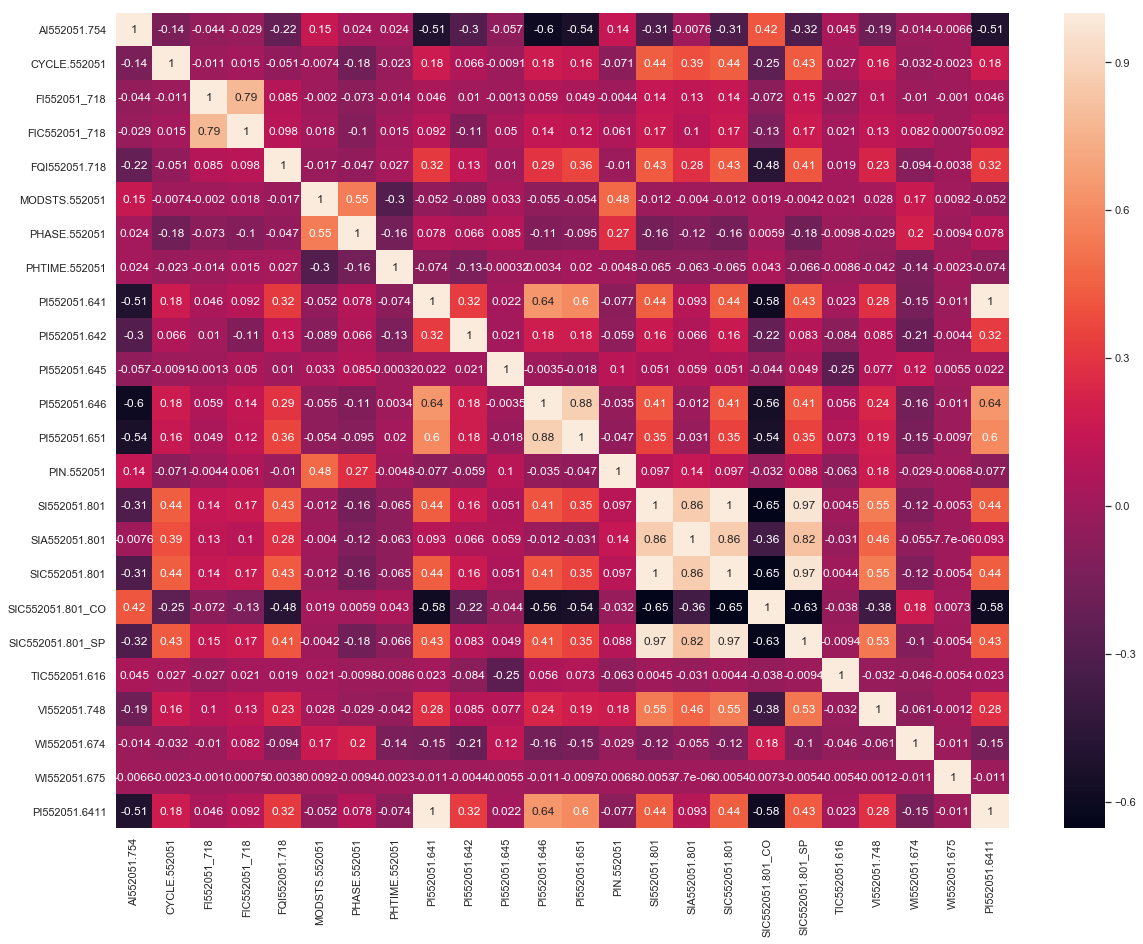

In [41]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns


import seaborn as sn
import matplotlib.pyplot as plt

import matplotlib.pyplot as plt

corr=fin_data.corr()


cm = corr
sns.set(font_scale=1.0)

plt.figure(figsize=(20,15))

sns.heatmap(corr, 
        xticklabels=corr.columns,
        yticklabels=corr.columns,annot=True)

In [43]:
fin_data.describe()

AI552051.754   CYCLE.552051   FI552051_718  FIC552051_718  \
count  109296.000000  109297.000000  109297.000000  109297.000000   
mean        3.745362       0.038134       0.025394      -0.253169   
std         4.737342       0.208021       0.165202     211.417547   
min        -0.607919       0.000000       0.012009    -578.453125   
25%         0.201305       0.000000       0.012009      12.009277   
50%         1.918298       0.000000       0.014512      14.511475   
75%         5.936950       0.000000       0.014512      14.511475   
max        25.449512       4.000000      10.392578   10560.250000   

       FQI552051.718  MODSTS.552051   PHASE.552051  PHTIME.552051  \
count  109297.000000   109297.00000  109297.000000  109275.000000   
mean       18.719692        8.05941      22.652535     127.697231   
std        63.107765        2.67287       9.027570     589.613905   
min         0.000000        0.00000       1.000000       0.000000   
25%         0.000000        8.00000      17.000000       0.549988   
50%         0.000000        8.00000      27.000000       2.747001   
75%         0.000000        8.00000      27.000000       3.108099   
max       302.351562       12.00000      31.000000    4294.375000   

        PI552051.641   PI552051.642  ...   SI552051.801  SIA552051.801  \
count  109274.000000  109296.000000  ...  109296.000000  109296.000000   
mean        0.012608       0.058218  ...      73.295942     207.216024   
std         0.016755       0.023378  ...     177.318889     173.444343   
min        -0.003017      -0.812993  ...      -2.016799     -25.549685   
25%        -0.001181       0.049927  ...      -1.501190     205.447918   
50%         0.004867       0.058945  ...      -1.491800     207.110905   
75%         0.021684       0.067940  ...      -0.991347     207.110905   
max         0.074879       1.258723  ...    1008.187500    1151.898438   

       SIC552051.801  SIC552051.801_CO  SIC552051.801_SP  TIC552051.616  \
count  109297.000000     109297.000000     109297.000000  109296.000000   
mean       73.294358         84.646554         77.132229      18.874035   
std       177.349490         35.445371        181.006212       1.523371   
min        -2.016513         -4.987590          0.000000     -25.356527   
25%        -1.501190         73.412712          0.000000      17.974154   
50%        -1.494526        104.998428          0.000000      18.474121   
75%        -0.998890        105.000000          0.023838      19.510667   
max      1009.601074        105.000000        999.935120     180.449219   

        VI552051.748   WI552051.674  WI552051.675  PI552051.6411  
count  109266.000000  109297.000000  1.092740e+05  109297.000000  
mean        0.142697     175.180023  1.449353e+15       0.012608  
std         0.569603      84.871529  1.139029e+17       0.016753  
min        -0.711548     103.880859  6.600000e+01      -0.003017  
25%        -0.001487     104.111328  7.430664e+01      -0.001181  
50%         0.023642     142.777359  8.236378e+01       0.004872  
75%         0.065140     259.132812  1.265641e+02       0.021665  
max        20.011494     648.005981  9.223230e+18       0.074879  

[8 rows x 24 columns]

In [44]:
fin_data.describe(include='object')

Timestamp AI552051.754_ALM BACT.552051 BCMPLT.552051 FAL552051.754  \
count       109297           109297      109297        109297        109297   
unique         758                5           2             3             3   
top     2015-10-20           Normal    Inactive      Complete            on   
freq           288            81250       65415         88326         83111   

       HV552051.331 HV552051.332 LAH552051.670 LAH552051.678 LAH552051.680  \
count        109297       109297        109297        109297        109297   
unique            4            4             4             2             3   
top             off          off            on            on            on   
freq          90904        89821         78153        109274         79147   

        ... PARTREC.552051 QCA552051_001 RUN.552051 SIC552051.801_ALM  \
count   ...         109297        109297     109297            109297   
unique  ...              3             3          8                 2   
top     ...            Man       No Data       Done            Normal   
freq    ...          93531         70047      88258            109274   

       SSOALM.552051 VI552051.748_ALM ZS552051.737 ZS552051.740 ZS552051_753  \
count         109297           109297       109297       109297       109297   
unique             3                4            4            4            4   
top           Normal           Normal           on          off       Normal   
freq           98634           109240        86749        88495        82570   

         status  
count    109297  
unique        5  
top     Noissue  
freq      99217  

[4 rows x 27 columns]

In [45]:
pd.crosstab(fin_data['status'], fin_data['BACT.552051'])

BACT.552051    Active  Inactive
status                         
Critical         1553       895
Failed           1699       893
Noissue         37715     61502
Suspect          1451       997
Very_critical    1464      1128

In [46]:
pd.crosstab(fin_data['status'], fin_data['AI552051.754_ALM'])

AI552051.754_ALM  Bad Input   HIGH  I/O Timeout  LOW  Normal
status                                                      
Critical                  0    576            0    0    1872
Failed                    1    542            0   20    2029
Noissue                  36  25241            1  350   73589
Suspect                   0    650            0    0    1798
Very_critical             2    628            0    0    1962

# frequency distribution of levels in derived column failure status

In [47]:
fin_data['status'].value_counts()

Noissue          99217
Very_critical     2592
Failed            2592
Suspect           2448
Critical          2448
Name: status, dtype: int64

In [48]:
fin_data.columns

Index(['Timestamp', 'AI552051.754', 'AI552051.754_ALM', 'BACT.552051',
       'BCMPLT.552051', 'CYCLE.552051', 'FAL552051.754', 'FI552051_718',
       'FIC552051_718', 'FQI552051.718', 'HV552051.331', 'HV552051.332',
       'LAH552051.670', 'LAH552051.678', 'LAH552051.680', 'M552051.801',
       'M552051.802', 'M552051.823', 'M552051.826', 'M552051.871',
       'MAINT.552051', 'MODMAN.552051', 'MODSTS.552051', 'PARTREC.552051',
       'PHASE.552051', 'PHTIME.552051', 'PI552051.641', 'PI552051.642',
       'PI552051.645', 'PI552051.646', 'PI552051.651', 'PIN.552051',
       'QCA552051_001', 'RUN.552051', 'SI552051.801', 'SIA552051.801',
       'SIC552051.801', 'SIC552051.801_ALM', 'SIC552051.801_CO',
       'SIC552051.801_SP', 'SSOALM.552051', 'TIC552051.616', 'VI552051.748',
       'VI552051.748_ALM', 'WI552051.674', 'WI552051.675', 'ZS552051.737',
       'ZS552051.740', 'ZS552051_753', 'PI552051.6411', 'status'],
      dtype='object')

# Creating moving average columns from sensor columns

In [54]:
 
sensor_cols = ['AI552051.754',
 'CYCLE.552051',
 'FI552051_718',
 'FIC552051_718',
 'FQI552051.718',
 'MODSTS.552051',
 'PHASE.552051',
 'PHTIME.552051',
 'PI552051.641',
 'PI552051.642',
 'PI552051.645',
 'PI552051.646',
 'PI552051.651',
 'PIN.552051',
 'SI552051.801',
 'SIA552051.801',
 'SIC552051.801',
 'SIC552051.801_CO',
 'SIC552051.801_SP',
 'TIC552051.616',
 'VI552051.748',
 'WI552051.674',
 'WI552051.675',
 'PI552051.6411']

sensor_av_cols = [('av'+'_'+nm) for nm in sensor_cols]
sensor_sd_cols = [('sd'+'_'+nm) for nm in sensor_cols]

In [57]:
df_sub = fin_data[sensor_cols]
av = df_sub.rolling(3, min_periods=1).mean()
av.columns = sensor_av_cols
    



In [58]:
av.head()

av_AI552051.754  av_CYCLE.552051  av_FI552051_718  av_FIC552051_718  \
288         0.102698              0.0         0.012009         12.009277   
289         0.103148              0.0         0.012009         12.009277   
290         0.103598              0.0         0.012009         12.009277   
291         0.104499              0.0         0.012009         12.009277   
292         0.105399              0.0         0.012009         12.927165   

     av_FQI552051.718  av_MODSTS.552051  av_PHASE.552051  av_PHTIME.552051  \
288               0.0               8.0             27.0          2.702065   
289               0.0               8.0             27.0          2.702072   
290               0.0               8.0             27.0          2.702079   
291               0.0               8.0             27.0          2.702092   
292               0.0               8.0             27.0          2.702106   

     av_PI552051.641  av_PI552051.642  ...  av_SI552051.801  av_SIA552051.801  \
288        -0.000930         0.098009  ...         -1.50119         -2.969579   
289        -0.000908         0.097989  ...         -1.50119         -2.832685   
290        -0.000901         0.098234  ...         -1.50119         -2.695792   
291        -0.000899         0.098473  ...         -1.50119         -2.422005   
292        -0.000897         0.098976  ...         -1.50119         -2.148218   

     av_SIC552051.801  av_SIC552051.801_CO  av_SIC552051.801_SP  \
288         -1.481054                105.0                  0.0   
289         -1.481541                105.0                  0.0   
290         -1.482029                105.0                  0.0   
291         -1.483004                105.0                  0.0   
292         -1.483979                105.0                  0.0   

     av_TIC552051.616  av_VI552051.748  av_WI552051.674  av_WI552051.675  \
288         19.470984          0.03903       103.946869       180.816177   
289         19.470555          0.03903       103.946766       180.817886   
290         19.470128          0.03903       103.946663       180.819600   
291         19.469272          0.03903       103.946459       180.823023   
292         19.468416          0.03903       103.946256       180.826447   

     av_PI552051.6411  
288         -0.000930  
289         -0.000908  
290         -0.000901  
291         -0.000899  
292         -0.000897  

[5 rows x 24 columns]

In [59]:
# get the rolling standard deviation for the subset
sd = df_sub.rolling(3, min_periods=1).std().fillna(0)
sd.columns = sensor_sd_cols
    
# combine the two new subset dataframes columns to the engine subset
new_ftrs = pd.concat([fin_data,av,sd], axis=1)
    
# add the new features rows to the output dataframe



In [60]:
new_ftrs.columns

Index(['Timestamp', 'AI552051.754', 'AI552051.754_ALM', 'BACT.552051',
       'BCMPLT.552051', 'CYCLE.552051', 'FAL552051.754', 'FI552051_718',
       'FIC552051_718', 'FQI552051.718', 'HV552051.331', 'HV552051.332',
       'LAH552051.670', 'LAH552051.678', 'LAH552051.680', 'M552051.801',
       'M552051.802', 'M552051.823', 'M552051.826', 'M552051.871',
       'MAINT.552051', 'MODMAN.552051', 'MODSTS.552051', 'PARTREC.552051',
       'PHASE.552051', 'PHTIME.552051', 'PI552051.641', 'PI552051.642',
       'PI552051.645', 'PI552051.646', 'PI552051.651', 'PIN.552051',
       'QCA552051_001', 'RUN.552051', 'SI552051.801', 'SIA552051.801',
       'SIC552051.801', 'SIC552051.801_ALM', 'SIC552051.801_CO',
       'SIC552051.801_SP', 'SSOALM.552051', 'TIC552051.616', 'VI552051.748',
       'VI552051.748_ALM', 'WI552051.674', 'WI552051.675', 'ZS552051.737',
       'ZS552051.740', 'ZS552051_753', 'PI552051.6411', 'status',
       'av_AI552051.754', 'av_CYCLE.552051', 'av_FI552051_718',
       'a

In [65]:
new_ftrs.shape

(109297, 99)

In [131]:
from sklearn.model_selection import train_test_split
y=new_ftrs['status']

In [132]:
new_ftrs=new_ftrs.fillna(0)

In [133]:
new_ftrs.isna().sum()

Timestamp              0
AI552051.754           0
AI552051.754_ALM       0
BACT.552051            0
BCMPLT.552051          0
CYCLE.552051           0
FAL552051.754          0
FI552051_718           0
FIC552051_718          0
FQI552051.718          0
HV552051.331           0
HV552051.332           0
LAH552051.670          0
LAH552051.678          0
LAH552051.680          0
M552051.801            0
M552051.802            0
M552051.823            0
M552051.826            0
M552051.871            0
MAINT.552051           0
MODMAN.552051          0
MODSTS.552051          0
PARTREC.552051         0
PHASE.552051           0
PHTIME.552051          0
PI552051.641           0
PI552051.642           0
PI552051.645           0
PI552051.646           0
                      ..
av_SIC552051.801_SP    0
av_TIC552051.616       0
av_VI552051.748        0
av_WI552051.674        0
av_WI552051.675        0
av_PI552051.6411       0
sd_AI552051.754        0
sd_CYCLE.552051        0
sd_FI552051_718        0


# Train Test split

In [134]:
# create training and testing vars
df_train, df_test, y_train, y_test = train_test_split(new_ftrs, y, test_size=0.3)
print(X_train.shape, y_train.shape)
print (X_test.shape, y_test.shape)

(76507, 97) (76507,)
(32790, 99) (32790,)


# Random forest classifier with grid search

In [90]:
from sklearn.model_selection import RandomizedSearchCV
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_jdepth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}
pprint(random_grid)

{'bootstrap': [True, False],
 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, None],
 'max_features': ['auto', 'sqrt'],
 'min_samples_leaf': [1, 2, 4],
 'min_samples_split': [2, 5, 10],
 'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000]}


In [115]:
X_train.columns

Index(['AI552051.754', 'AI552051.754_ALM', 'BACT.552051', 'BCMPLT.552051',
       'CYCLE.552051', 'FAL552051.754', 'FI552051_718', 'FIC552051_718',
       'FQI552051.718', 'HV552051.331', 'HV552051.332', 'LAH552051.670',
       'LAH552051.678', 'LAH552051.680', 'M552051.801', 'M552051.802',
       'M552051.823', 'M552051.826', 'M552051.871', 'MAINT.552051',
       'MODMAN.552051', 'MODSTS.552051', 'PARTREC.552051', 'PHASE.552051',
       'PHTIME.552051', 'PI552051.641', 'PI552051.642', 'PI552051.645',
       'PI552051.646', 'PI552051.651', 'PIN.552051', 'QCA552051_001',
       'RUN.552051', 'SI552051.801', 'SIA552051.801', 'SIC552051.801',
       'SIC552051.801_ALM', 'SIC552051.801_CO', 'SIC552051.801_SP',
       'SSOALM.552051', 'TIC552051.616', 'VI552051.748', 'VI552051.748_ALM',
       'WI552051.674', 'WI552051.675', 'ZS552051.737', 'ZS552051.740',
       'ZS552051_753', 'PI552051.6411', 'av_AI552051.754', 'av_CYCLE.552051',
       'av_FI552051_718', 'av_FIC552051_718', 'av_FQI55205

In [136]:
df_train.drop(['status'],axis=1,inplace=True)

/Users/navyarao/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:3940: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


In [138]:
df_train.drop(['Timestamp'],axis=1,inplace=True)

In [139]:
df_train.columns

Index(['AI552051.754', 'AI552051.754_ALM', 'BACT.552051', 'BCMPLT.552051',
       'CYCLE.552051', 'FAL552051.754', 'FI552051_718', 'FIC552051_718',
       'FQI552051.718', 'HV552051.331', 'HV552051.332', 'LAH552051.670',
       'LAH552051.678', 'LAH552051.680', 'M552051.801', 'M552051.802',
       'M552051.823', 'M552051.826', 'M552051.871', 'MAINT.552051',
       'MODMAN.552051', 'MODSTS.552051', 'PARTREC.552051', 'PHASE.552051',
       'PHTIME.552051', 'PI552051.641', 'PI552051.642', 'PI552051.645',
       'PI552051.646', 'PI552051.651', 'PIN.552051', 'QCA552051_001',
       'RUN.552051', 'SI552051.801', 'SIA552051.801', 'SIC552051.801',
       'SIC552051.801_ALM', 'SIC552051.801_CO', 'SIC552051.801_SP',
       'SSOALM.552051', 'TIC552051.616', 'VI552051.748', 'VI552051.748_ALM',
       'WI552051.674', 'WI552051.675', 'ZS552051.737', 'ZS552051.740',
       'ZS552051_753', 'PI552051.6411', 'av_AI552051.754', 'av_CYCLE.552051',
       'av_FI552051_718', 'av_FIC552051_718', 'av_FQI55205

In [140]:
df = pd.get_dummies(df_train)

In [141]:
df.columns

Index(['AI552051.754', 'CYCLE.552051', 'FI552051_718', 'FIC552051_718',
       'FQI552051.718', 'MODSTS.552051', 'PHASE.552051', 'PHTIME.552051',
       'PI552051.641', 'PI552051.642',
       ...
       'ZS552051.737_off', 'ZS552051.737_on', 'ZS552051.740_Bad Input',
       'ZS552051.740_No Data', 'ZS552051.740_off', 'ZS552051.740_on',
       'ZS552051_753_Bad Input', 'ZS552051_753_HEEL POSITION',
       'ZS552051_753_No Data', 'ZS552051_753_Normal'],
      dtype='object', length=158)

In [142]:
df.isna().sum()

AI552051.754                    0
CYCLE.552051                    0
FI552051_718                    0
FIC552051_718                   0
FQI552051.718                   0
MODSTS.552051                   0
PHASE.552051                    0
PHTIME.552051                   0
PI552051.641                    0
PI552051.642                    0
PI552051.645                    0
PI552051.646                    0
PI552051.651                    0
PIN.552051                      0
SI552051.801                    0
SIA552051.801                   0
SIC552051.801                   0
SIC552051.801_CO                0
SIC552051.801_SP                0
TIC552051.616                   0
VI552051.748                    0
WI552051.674                    0
WI552051.675                    0
PI552051.6411                   0
av_AI552051.754                 0
av_CYCLE.552051                 0
av_FI552051_718                 0
av_FIC552051_718                0
av_FQI552051.718                0
av_MODSTS.5520

In [143]:
# Use the random grid to search for best hyperparameters
# First create the base model to tune
rf = RandomForestClassifier()
# Random search of parameters, using 3 fold cross validation, 
# search across 100 different combinations, and use all available cores
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 100, cv = 3, verbose=2, random_state=42, n_jobs = -1)
# Fit the random search model
rf_random.fit(df,y_train)


Fitting 3 folds for each of 100 candidates, totalling 300 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed:  9.7min
/Users/navyarao/anaconda3/lib/python3.7/site-packages/joblib/externals/loky/process_executor.py:706: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  "timeout or by a memory leak.", UserWarning
/Users/navyarao/anaconda3/lib/python3.7/site-packages/joblib/externals/loky/process_executor.py:706: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  "timeout or by a memory leak.", UserWarning
/Users/navyarao/anaconda3/lib/python3.7/site-packages/joblib/externals/loky/process_executor.py:706: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  "timeout or by a memory leak.", 

RandomizedSearchCV(cv=3, error_score=nan,
                   estimator=RandomForestClassifier(bootstrap=True,
                                                    ccp_alpha=0.0,
                                                    class_weight=None,
                                                    criterion='gini',
                                                    max_depth=None,
                                                    max_features='auto',
                                                    max_leaf_nodes=None,
                                                    max_samples=None,
                                                    min_impurity_decrease=0.0,
                                                    min_impurity_split=None,
                                                    min_samples_leaf=1,
                                                    min_samples_split=2,
                                                    min_weight_fraction_leaf=0.0,
               

In [144]:
rf_random.best_params_

{'n_estimators': 1200,
 'min_samples_split': 10,
 'min_samples_leaf': 2,
 'max_features': 'auto',
 'max_depth': None,
 'bootstrap': False}

In [146]:
best_random = rf_random.best_estimator_


In [164]:
#df_test.drop(['Timestamp'],axis=1,inplace=True)
#df_test.drop(['status'],axis=1,inplace=True)
df_test_dummies = pd.get_dummies(df_test)

test_features=df_test_dummies.columns
print(test_features)

Index(['AI552051.754', 'CYCLE.552051', 'FI552051_718', 'FIC552051_718',
       'FQI552051.718', 'MODSTS.552051', 'PHASE.552051', 'PHTIME.552051',
       'PI552051.641', 'PI552051.642',
       ...
       'ZS552051.737_off', 'ZS552051.737_on', 'ZS552051.740_Bad Input',
       'ZS552051.740_No Data', 'ZS552051.740_off', 'ZS552051.740_on',
       'ZS552051_753_Bad Input', 'ZS552051_753_HEEL POSITION',
       'ZS552051_753_No Data', 'ZS552051_753_Normal'],
      dtype='object', length=155)


In [166]:
print(len(df.columns))
print(len(df_test_dummies.columns))

158
158


In [178]:
df_test_dummies.head()

AI552051.754  CYCLE.552051  FI552051_718  FIC552051_718  FQI552051.718  \
76380      8.652232           0.0      0.014512      14.511475            0.0   
86860      0.173496           1.0      0.012009      12.009277            0.0   
63581     13.396491           0.0      0.014512      12.009277            0.0   
69619     12.478286           0.0      0.014512      14.511475            0.0   
15293      4.059679           0.0      0.014763      14.511475            0.0   

       MODSTS.552051  PHASE.552051  PHTIME.552051  PI552051.641  PI552051.642  \
76380           10.0          27.0      61.465820      0.007526      0.020653   
86860            8.0          28.0     371.895569      0.020761      0.060432   
63581           10.0          17.0    2101.875000     -0.000836      0.004929   
69619            8.0          27.0       0.412498     -0.001080      0.053680   
15293            8.0          27.0       2.903215     -0.001554      0.046928   

       ...  ZS552051.740_No Data  ZS552051.740_off  ZS552051.740_on  \
76380  ...                     0                 1                0   
86860  ...                     0                 1                0   
63581  ...                     0                 1                0   
69619  ...                     0                 1                0   
15293  ...                     1                 0                0   

       ZS552051_753_Bad Input  ZS552051_753_HEEL POSITION  \
76380                       0                           0   
86860                       0                           0   
63581                       0                           0   
69619                       0                           0   
15293                       0                           0   

       ZS552051_753_No Data  ZS552051_753_Normal  \
76380                     0                    1   
86860                     0                    1   
63581                     0                    1   
69619                     0                    1   
15293                     1                    0   

       VI552051.748_ALM_I/O Timeout  AI552051.754_ALM_I/O Timeout  \
76380                             0                             0   
86860                             0                             0   
63581                             0                             0   
69619                             0                             0   
15293                             0                             0   

       RUN.552051_?3  
76380              0  
86860              0  
63581              0  
69619              0  
15293              0  

[5 rows x 158 columns]

In [179]:
predictions = best_random.predict(df_test_dummies)


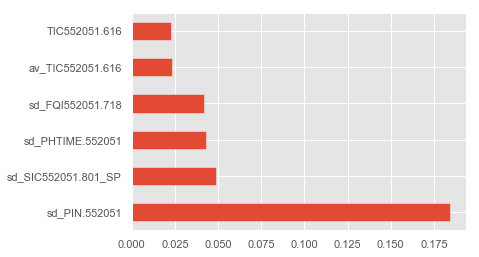

In [392]:
feat_importances = pd.Series(best_random.feature_importances_, index=df.columns)
feat_importances.nlargest(6).plot(kind='barh')

In [181]:
predictions

array(['Noissue', 'Noissue', 'Critical', ..., 'Noissue', 'Noissue',
       'Noissue'], dtype=object)

In [180]:
from sklearn.metrics import confusion_matrix 
from sklearn.metrics import accuracy_score 
from sklearn.metrics import classification_report

In [184]:
results = confusion_matrix(y_test, predictions) 
print(results)

[[  689    17     2     5     5]
 [   26   760    32     0     2]
 [    0     0 29757     0     0]
 [    4     0     4   698     8]
 [    3     2     1    15   760]]


In [192]:
predictions_prob=best_random.predict_proba(df_test_dummies)

In [193]:
predictions_prob

array([[0.02208344, 0.07533366, 0.84510251, 0.02838514, 0.02909524],
       [0.0624375 , 0.07380324, 0.73769246, 0.05093353, 0.07513327],
       [0.60623506, 0.08906118, 0.13217361, 0.10311077, 0.06941939],
       ...,
       [0.05448545, 0.10970205, 0.74848115, 0.02772288, 0.05960847],
       [0.02144992, 0.04403869, 0.89382537, 0.00873644, 0.03194958],
       [0.01897439, 0.07729067, 0.84689815, 0.02861607, 0.02822071]])

In [185]:
accuracy_score(y_test, predictions) 

0.9961573650503203

In [239]:
sk_report = classification_report(
    digits=6,
    y_true=y_test, 
    y_pred=predictions)
print(sk_report)

               precision    recall  f1-score   support

     Critical   0.954294  0.959610  0.956944       718
       Failed   0.975610  0.926829  0.950594       820
      Noissue   0.998691  1.000000  0.999345     29757
      Suspect   0.972145  0.977591  0.974860       714
Very_critical   0.980645  0.973111  0.976864       781

     accuracy                       0.996157     32790
    macro avg   0.976277  0.967428  0.971722     32790
 weighted avg   0.996134  0.996157  0.996129     32790



In [186]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score


from matplotlib import pyplot

In [194]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

In [207]:
df_tr_lbl.dtypes

Timestamp             object
AI552051.754         float64
AI552051.754_ALM      object
BACT.552051           object
BCMPLT.552051         object
CYCLE.552051         float64
FAL552051.754         object
FI552051_718         float64
FIC552051_718        float64
FQI552051.718        float64
HV552051.331          object
HV552051.332          object
LAH552051.670         object
LAH552051.678         object
LAH552051.680         object
M552051.801           object
M552051.802           object
M552051.823           object
M552051.826           object
M552051.871           object
MAINT.552051          object
MODMAN.552051         object
MODSTS.552051        float64
PARTREC.552051        object
PHASE.552051         float64
PHTIME.552051        float64
PI552051.641         float64
PI552051.642         float64
PI552051.645         float64
PI552051.646         float64
PI552051.651         float64
PIN.552051           float64
QCA552051_001         object
RUN.552051            object
SI552051.801  

# Deriving binary status variable. 1 as failure and 0 as non-failure 

In [221]:
df_binary=df_tr_lbl
df_binary['Timestamp']=df_binary['Timestamp'].dt.date
df_binary['Timestamp']=df_binary['Timestamp'].astype('str')
from datetime import timedelta
empt_binary=pd.DataFrame()
for i in range(0,len(failure_data)):
    for j in range(0,4):
        back=(failure_data['Datetime_failure'][i]-(timedelta(days=j))).strftime('%Y-%m-%d')   
        masked_data=df_binary[df_binary.Timestamp == back]
        masked_data['status']=1
        empt_binary=pd.concat([masked_data,empt_kmeans],axis=0)

/Users/navyarao/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  # Remove the CWD from sys.path while we load stuff.


In [232]:
empt_binary.dtypes

Timestamp             object
AI552051.754         float64
AI552051.754_ALM      object
BACT.552051           object
BCMPLT.552051         object
CYCLE.552051         float64
FAL552051.754         object
FI552051_718         float64
FIC552051_718        float64
FQI552051.718        float64
HV552051.331          object
HV552051.332          object
LAH552051.670         object
LAH552051.678         object
LAH552051.680         object
M552051.801           object
M552051.802           object
M552051.823           object
M552051.826           object
M552051.871           object
MAINT.552051          object
MODMAN.552051         object
MODSTS.552051        float64
PARTREC.552051        object
PHASE.552051         float64
PHTIME.552051        float64
PI552051.641         float64
PI552051.642         float64
PI552051.645         float64
PI552051.646         float64
PI552051.651         float64
PIN.552051           float64
QCA552051_001         object
RUN.552051            object
SI552051.801  

In [231]:
empt_binary['status']=empt_binary['status'].astype('str')

In [344]:
new_dts=df_binary[~df_binary['Timestamp'].isin(dates)]
new_dts['status']='0'
fin_data_bin=pd.concat([new_dts,empt_binary],axis=0)

/Users/navyarao/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [345]:
fin_data_bin.shape
fin_data_bin.columns

Index(['Timestamp', 'AI552051.754', 'AI552051.754_ALM', 'BACT.552051',
       'BCMPLT.552051', 'CYCLE.552051', 'FAL552051.754', 'FI552051_718',
       'FIC552051_718', 'FQI552051.718', 'HV552051.331', 'HV552051.332',
       'LAH552051.670', 'LAH552051.678', 'LAH552051.680', 'M552051.801',
       'M552051.802', 'M552051.823', 'M552051.826', 'M552051.871',
       'MAINT.552051', 'MODMAN.552051', 'MODSTS.552051', 'PARTREC.552051',
       'PHASE.552051', 'PHTIME.552051', 'PI552051.641', 'PI552051.642',
       'PI552051.645', 'PI552051.646', 'PI552051.651', 'PIN.552051',
       'QCA552051_001', 'RUN.552051', 'SI552051.801', 'SIA552051.801',
       'SIC552051.801', 'SIC552051.801_ALM', 'SIC552051.801_CO',
       'SIC552051.801_SP', 'SSOALM.552051', 'TIC552051.616', 'VI552051.748',
       'VI552051.748_ALM', 'WI552051.674', 'WI552051.675', 'ZS552051.737',
       'ZS552051.740', 'ZS552051_753', 'PI552051.6411', 'status'],
      dtype='object')

In [267]:
empt_kmeans=fin_data_bin.drop(['status'],axis=1)

In [268]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.datasets.samples_generator import make_blobs
from sklearn.cluster import KMeans

In [269]:
num_cols = empt_kmeans.columns[empt_kmeans.dtypes.apply(lambda c: np.issubdtype(c, np.number))]

In [270]:
nums=empt_kmeans[num_cols]

In [271]:
nums.columns

Index(['AI552051.754', 'CYCLE.552051', 'FI552051_718', 'FIC552051_718',
       'FQI552051.718', 'MODSTS.552051', 'PHASE.552051', 'PHTIME.552051',
       'PI552051.641', 'PI552051.642', 'PI552051.645', 'PI552051.646',
       'PI552051.651', 'PIN.552051', 'SI552051.801', 'SIA552051.801',
       'SIC552051.801', 'SIC552051.801_CO', 'SIC552051.801_SP',
       'TIC552051.616', 'VI552051.748', 'WI552051.674', 'WI552051.675',
       'PI552051.6411'],
      dtype='object')

In [272]:
scaler = StandardScaler()
empt_kmeans[num_cols] = scaler.fit_transform(empt_kmeans[num_cols])
empt_kmeans.head()

Timestamp  AI552051.754 AI552051.754_ALM BACT.552051 BCMPLT.552051  \
288  2015-04-03     -0.765307           Normal    Inactive      Complete   
289  2015-04-03     -0.765119           Normal    Inactive      Complete   
290  2015-04-03     -0.764931           Normal    Inactive      Complete   
291  2015-04-03     -0.764743           Normal    Inactive      Complete   
292  2015-04-03     -0.764556           Normal    Inactive      Complete   

     CYCLE.552051 FAL552051.754  FI552051_718  FIC552051_718  FQI552051.718  \
288     -0.183194            on      -0.08099       0.057947       -0.29642   
289     -0.183194            on      -0.08099       0.057947       -0.29642   
290     -0.183194            on      -0.08099       0.057947       -0.29642   
291     -0.183194            on      -0.08099       0.057947       -0.29642   
292     -0.183194            on      -0.08099       0.070981       -0.29642   

     ... SSOALM.552051 TIC552051.616 VI552051.748 VI552051.748_ALM  \
288  ...        Normal      0.391027    -0.181734           Normal   
289  ...        Normal      0.390465    -0.181734           Normal   
290  ...        Normal      0.389904    -0.181734           Normal   
291  ...        Normal      0.389341    -0.181734           Normal   
292  ...        Normal      0.388779    -0.181734           Normal   

    WI552051.674 WI552051.675 ZS552051.737 ZS552051.740 ZS552051_753  \
288    -0.838633    -0.012716      No Data      No Data      No Data   
289    -0.838635    -0.012716      No Data      No Data      No Data   
290    -0.838637    -0.012716      No Data      No Data      No Data   
291    -0.838640    -0.012716      No Data      No Data      No Data   
292    -0.838642    -0.012716      No Data      No Data      No Data   

    PI552051.6411  
288     -0.807155  
289     -0.804573  
290     -0.804538  
291     -0.806826  
292     -0.804217  

[5 rows x 50 columns]

In [273]:
empt_kmeans.drop(['Timestamp'],axis=1,inplace=True)

# Fitting kmeans column

In [302]:
kmeans_clust=KMeans(n_clusters=2)


In [303]:
df_kmeans=pd.get_dummies(empt_kmeans)

In [304]:
df_kmeans.fillna(0,inplace=True)

In [305]:
x = df_kmeans.iloc[:, :].values

In [306]:
kmeans_clust.fit_predict(x)

array([0, 0, 0, ..., 0, 0, 0], dtype=int32)

In [307]:
df_kmeans['cluster']=kmeans_clust.labels_

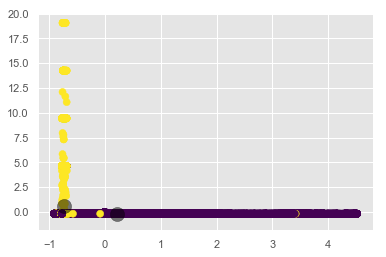

In [308]:
plt.scatter(x[:, 0], x[:, 1], c=df_kmeans['cluster'], s=50, cmap='viridis')

centers = kmeans_clust.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.5);


In [309]:
df_kmeans['cluster']=df_kmeans['cluster'].astype('str')

In [310]:
df_kmeans.shape

(109441, 111)

In [311]:
df_kmeans['cluster'].value_counts()

0    85086
1    24355
Name: cluster, dtype: int64

In [312]:
fin_data_bin['cluster']=df_kmeans['cluster']

In [313]:
anom=fin_data_bin[fin_data_bin['cluster']=='0']

In [295]:
failure_data.columns

Index(['Order Type', 'Order Type Description', 'Functional Location',
       'Unnamed: 3', 'Maintenance Order', 'Maintenance Order Details',
       'Notification', 'Breakdown indicator', 'FailureStartDate',
       'FailureStartTime', 'actual work\nin hours', 'Datetime_failure'],
      dtype='object')

In [296]:
failure_data['Datetime_failure']=failure_data['Datetime_failure'].dt.date
failure_data['Datetime_failure']=failure_data['Datetime_failure'].astype('str')

In [294]:
fin_data_bin['Timestamp']

288    2015-04-03
289    2015-04-03
290    2015-04-03
291    2015-04-03
292    2015-04-03
293    2015-04-03
294    2015-04-03
295    2015-04-03
296    2015-04-03
297    2015-04-03
298    2015-04-03
299    2015-04-03
300    2015-04-03
301    2015-04-03
302    2015-04-03
303    2015-04-03
304    2015-04-03
305    2015-04-03
306    2015-04-03
307    2015-04-03
308    2015-04-03
309    2015-04-03
310    2015-04-03
311    2015-04-03
312    2015-04-03
313    2015-04-03
314    2015-04-03
315    2015-04-03
316    2015-04-03
317    2015-04-03
          ...    
258    2015-04-02
259    2015-04-02
260    2015-04-02
261    2015-04-02
262    2015-04-02
263    2015-04-02
264    2015-04-02
265    2015-04-02
266    2015-04-02
267    2015-04-02
268    2015-04-02
269    2015-04-02
270    2015-04-02
271    2015-04-02
272    2015-04-02
273    2015-04-02
274    2015-04-02
275    2015-04-02
276    2015-04-02
277    2015-04-02
278    2015-04-02
279    2015-04-02
280    2015-04-02
281    2015-04-02
282    201

In [314]:
failure_data.Datetime_failure.isin(anom.Timestamp).astype(int)


0     0
1     0
2     1
3     1
4     1
5     1
6     1
7     1
8     1
9     0
10    0
11    1
12    1
13    0
14    1
15    1
16    1
17    1
18    0
19    0
20    1
21    1
22    1
23    0
24    1
Name: Datetime_failure, dtype: int64

In [315]:
fin_data_bin.dtypes

Timestamp             object
AI552051.754         float64
AI552051.754_ALM      object
BACT.552051           object
BCMPLT.552051         object
CYCLE.552051         float64
FAL552051.754         object
FI552051_718         float64
FIC552051_718        float64
FQI552051.718        float64
HV552051.331          object
HV552051.332          object
LAH552051.670         object
LAH552051.678         object
LAH552051.680         object
M552051.801           object
M552051.802           object
M552051.823           object
M552051.826           object
M552051.871           object
MAINT.552051          object
MODMAN.552051         object
MODSTS.552051        float64
PARTREC.552051        object
PHASE.552051         float64
PHTIME.552051        float64
PI552051.641         float64
PI552051.642         float64
PI552051.645         float64
PI552051.646         float64
PI552051.651         float64
PIN.552051           float64
QCA552051_001         object
RUN.552051            object
SI552051.801  

In [320]:
df_kmeans.columns

Index(['AI552051.754', 'CYCLE.552051', 'FI552051_718', 'FIC552051_718',
       'FQI552051.718', 'MODSTS.552051', 'PHASE.552051', 'PHTIME.552051',
       'PI552051.641', 'PI552051.642',
       ...
       'ZS552051.737_on', 'ZS552051.740_Bad Input', 'ZS552051.740_No Data',
       'ZS552051.740_off', 'ZS552051.740_on', 'ZS552051_753_Bad Input',
       'ZS552051_753_HEEL POSITION', 'ZS552051_753_No Data',
       'ZS552051_753_Normal', 'cluster'],
      dtype='object', length=111)

In [338]:
fin_data_bin.columns

Index(['Timestamp', 'AI552051.754', 'AI552051.754_ALM', 'BACT.552051',
       'BCMPLT.552051', 'CYCLE.552051', 'FAL552051.754', 'FI552051_718',
       'FIC552051_718', 'FQI552051.718', 'HV552051.331', 'HV552051.332',
       'LAH552051.670', 'LAH552051.678', 'LAH552051.680', 'M552051.801',
       'M552051.802', 'M552051.823', 'M552051.826', 'M552051.871',
       'MAINT.552051', 'MODMAN.552051', 'MODSTS.552051', 'PARTREC.552051',
       'PHASE.552051', 'PHTIME.552051', 'PI552051.641', 'PI552051.642',
       'PI552051.645', 'PI552051.646', 'PI552051.651', 'PIN.552051',
       'QCA552051_001', 'RUN.552051', 'SI552051.801', 'SIA552051.801',
       'SIC552051.801', 'SIC552051.801_ALM', 'SIC552051.801_CO',
       'SIC552051.801_SP', 'SSOALM.552051', 'TIC552051.616', 'VI552051.748',
       'VI552051.748_ALM', 'WI552051.674', 'WI552051.675', 'ZS552051.737',
       'ZS552051.740', 'ZS552051_753', 'PI552051.6411', 'status'],
      dtype='object')

In [339]:
decsion_treedata=fin_data_bin

In [340]:
#fin_data_bin.dtypes
decsion_treedata.drop(['Timestamp'],axis=1,inplace=True)
decsion_treedata.drop(['status'],axis=1,inplace=True)



In [372]:
decsion_treedata_dummies=pd.get_dummies(decsion_treedata)

In [373]:
fin_data_bin.columns

Index(['Timestamp', 'AI552051.754', 'AI552051.754_ALM', 'BACT.552051',
       'BCMPLT.552051', 'CYCLE.552051', 'FAL552051.754', 'FI552051_718',
       'FIC552051_718', 'FQI552051.718', 'HV552051.331', 'HV552051.332',
       'LAH552051.670', 'LAH552051.678', 'LAH552051.680', 'M552051.801',
       'M552051.802', 'M552051.823', 'M552051.826', 'M552051.871',
       'MAINT.552051', 'MODMAN.552051', 'MODSTS.552051', 'PARTREC.552051',
       'PHASE.552051', 'PHTIME.552051', 'PI552051.641', 'PI552051.642',
       'PI552051.645', 'PI552051.646', 'PI552051.651', 'PIN.552051',
       'QCA552051_001', 'RUN.552051', 'SI552051.801', 'SIA552051.801',
       'SIC552051.801', 'SIC552051.801_ALM', 'SIC552051.801_CO',
       'SIC552051.801_SP', 'SSOALM.552051', 'TIC552051.616', 'VI552051.748',
       'VI552051.748_ALM', 'WI552051.674', 'WI552051.675', 'ZS552051.737',
       'ZS552051.740', 'ZS552051_753', 'PI552051.6411', 'status'],
      dtype='object')

In [374]:
decsion_treedata_dummies['status']=fin_data_bin['status']

In [375]:
from sklearn.model_selection import GridSearchCV, cross_val_score

# Decision tree with gridsearch

In [376]:

from sklearn import tree
decisiontree = tree.DecisionTreeClassifier()


In [377]:
criterion = ['gini', 'entropy']
max_depth = [4,6,8,12]
sample_split_range = list(range(1, 50))

In [378]:
param_grid = dict(min_samples_split=sample_split_range,max_depth=max_depth,criterion=criterion)


In [379]:
clf = GridSearchCV(decisiontree,param_grid)

In [380]:
decsion_treedata_dummies.fillna(0,inplace=True)

In [381]:
y = decsion_treedata_dummies['status']

X = decsion_treedata_dummies
X.drop(['status'],axis=1,inplace=True)

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

In [388]:
y_test.value_counts()

0    24748
1     2613
Name: status, dtype: int64

In [382]:
clf.fit(X_train, y_train)

/Users/navyarao/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
/Users/navyarao/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
/Users/navyarao/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater t

/Users/navyarao/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
/Users/navyarao/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
/Users/navyarao/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater t

GridSearchCV(cv=None, error_score=nan,
             estimator=DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort='deprecated',
                                              random_state=None,
                                              splitter='best'),
             iid='deprecated', n_jobs=None,
             param_grid={'criterion': ['gini', 'entropy'],
                

In [384]:
y_pred_class = clf.predict(X_test)

In [387]:
y_pred_class

array(['0', '0', '0', ..., '0', '0', '0'], dtype=object)

# Accuracy on test data

In [385]:
from sklearn import metrics
metrics.accuracy_score(y_test, y_pred_class)


0.9885603596359782

# classification Report with different evaluation metric

In [386]:
sk_report = classification_report(
    digits=6,
    y_true=y_test, 
    y_pred=y_pred_class)
print(sk_report)

              precision    recall  f1-score   support

           0   0.997313  0.990019  0.993653     24748
           1   0.911596  0.974742  0.942112      2613

    accuracy                       0.988560     27361
   macro avg   0.954455  0.982381  0.967883     27361
weighted avg   0.989127  0.988560  0.988731     27361



# Function to take the test point from streaming data. Gives predictions based on K-means, Random forest and decision tree models

In [ ]:
def overall_pred(test_data,trained_data):
    test_data=pd.DataFrame(test_data)
    nums=test_data.select_dtypes(include=['float64','int'])
    cols=nums.columns
    for i in cols:
        test_data.loc[test_data[i].str.contains('Bad input', case=False), i] = test_data.i.mean()
    consolid_data=pd.concat(trained_data,test_data)
    sensor_av_cols = [('av'+'_'+nm) for nm in sensor_cols]
    sensor_sd_cols = [('sd'+'_'+nm) for nm in sensor_cols]
    df_sub = consolid_data[sensor_cols]
    av = df_sub.rolling(3, min_periods=1).mean()
    av.columns = sensor_av_cols
    sd = df_sub.rolling(3, min_periods=1).std().fillna(0)
    sd.columns = sensor_sd_cols
    new_dt= pd.concat([consolid_data,av,sd], axis=1)
    test_point=new_dt.iloc[-1,:]
    test_point_dummies=pd.get_dummies(test_point)
    predictions_rf = best_random.predict(test_point_dummies)
    test_data[num_cols] = scaler.fit_transform(test_data[num_cols])
    test_data_kmeans_dummies=pd.get_dummies(test_data)
    pred_kmenas=kmeans_clust.predict(test_data_kmeans_dummies)
    predictions_decision_tree = clf.predict(test_data_kmeans_dummies)
    preds=list(predictions_rf,pred_kmenas,predictions_decision_tree)
    return(preds)
    